# HW1  Try out gradient descent

## Due Thursday Feb 3rd, 2022 at 11:59PM

You should submit this jupyter notebook with your solutions. The solutions should include the code and also the output of all the cells.

Note that for the problmes that require a cost function as input you should always use the most recent cost function that you have implemented (unless specified otherwise).


- CS 274
- Deadline: 2/3/2022

Note that current notebook has the following functions
 - _gradient_descent()_  - for question #2
 - _autograd_gradient_descent()_ - for question #6
 - _dim_gradient_descent()_ - for question #8
 - _multiple_gradient_descent()_ - for question #10

1) [5 points] Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w - 50 \right)$

**Answer**: $\frac{\partial}{\partial w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10\right)$

2) [25 points] Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [1]:
#gradient descent function
#inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)

def gradient_descent(alpha, max_its, w0):
    ''' Pseudocode:
    For i until K where K = max_iterations, 
        new_weight = old_weight - alpha x gradient x old_weight
        save new_weight in an array! 
    '''
    cost_function = lambda w:(w**4 + w**2 + 10*w - 50)/50
    gradient = lambda w:(4*w**3 + 2*w + 10)/50
    
    weights_hist = []
    cost_hist = []
    
    # Code only for Initial Values
    w = w0
    cost_init = cost_function(w)
    weights_hist.append(w)
    cost_hist.append(cost_init)
    
    for i in range(max_its): 
        w = w - alpha * gradient(w)
        cost = cost_function(w)   # cost function defined above
        
        weights_hist.append(w)
        cost_hist.append(cost)
    
    # history_df = pd.DataFrame({'cost':cost_hist, 'weights':weights_hist})

    return cost_hist

3) [10 points] Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). 


$w^0$ = 2.0
max_its = 1000

# first run
alpha = 1
# second run
alpha = 0.1
# third run
alpha = 0.01


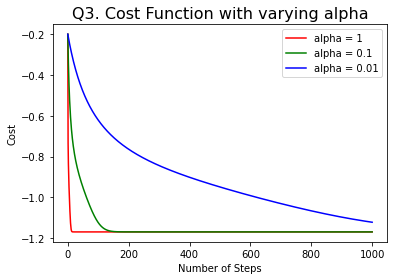

In [2]:
import matplotlib.pyplot as plt
# To keep your plots embedded
%matplotlib inline 

##Your code here
plt.title("Q3. Cost Function with varying alpha", size = 16)
plt.plot(gradient_descent(1, 1000, 2.0), color = 'r', label="alpha = 1")
plt.plot(gradient_descent(0.1, 1000, 2.0), color = 'g', label="alpha = 0.1")
plt.plot(gradient_descent(0.01, 1000, 2.0), color = 'b', label="alpha = 0.01")
plt.xlabel("Number of Steps")
plt.ylabel("Cost")
plt.legend()

plt.show()

For the next few problems we will be comparing fixed and diminishing learning rates

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

4) [5 points] Is this function convex? If no, why not? If yes, where is its global minimum?

**Answer**: Yes the function is convex. The global minimum is at $w$ = 0 

5) [5 points] What is the derivative of the cost function? 

**Answer**: $f'(w) = \frac{w}{|w|}$, where $w \neq 0$

6) [20 points] Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function. 

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [3]:
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def autograd_gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function  

    ##Your code here    
    weights_history = []
    cost_history = []
    
    # Only for Initial Values
    w = w0
    cost_init = g(w)
    weights_history.append(w)
    cost_history.append(cost_init)
    
    for i in range(max_its): 
        w = w - alpha * gradient(w)
        cost = g(w)   # cost function defined as argument
        
        weights_history.append(w)
        cost_history.append(cost)
    
#     history_df = pd.DataFrame({'cost':cost_history, 'weights':weights_history})    
#     return history_df   ## returning a dataframe bc it's easier to manipulate for plotting
    
    return weights_history, cost_history

7) [10 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

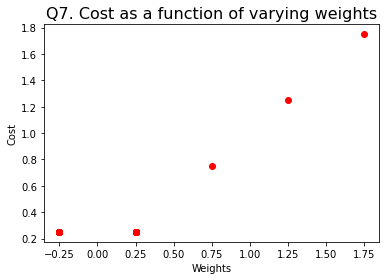

In [4]:
# New Cost Function (absolute value)
g = lambda x:abs(x)

alpha = 0.5
max_its = 20
w0 = 1.75
(weights, cost) = autograd_gradient_descent(g, alpha, max_its, w0)

plt.title('Q7. Cost as a function of varying weights', size=16)
plt.scatter(x = weights, y = cost, color = 'r')   # Representing it as scatter since the points are oscillating
plt.xlabel("Weights")
plt.ylabel("Cost")
plt.show()

8) [15 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

In [5]:
from autograd import grad 

#gradient descent function - made function generalizable for all alpha values! 
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def dim_gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function 
      
    weights_history = []
    cost_history = []
    
    # Only for Initial Values
    w = w0
    cost_init = g(w)
    weights_history.append(w)
    cost_history.append(cost_init)
    
    for i in range(max_its):
        a_new = alpha/(i+1)
        w = w - a_new * gradient(w)
        cost = g(w)   # cost function defined as argument
        
        weights_history.append(w)
        cost_history.append(cost)
    
#     history_df = pd.DataFrame({'cost':cost_history, 'weights':weights_history})    
#     return history_df   

    return weights_history, cost_history

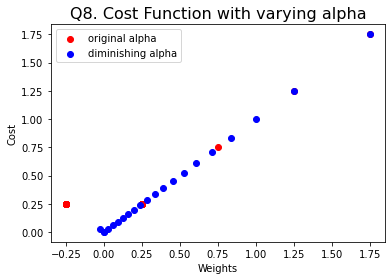

In [6]:
g = lambda x:abs(x)
alpha = 0.5
max_its = 20
w0 = 1.75
(weights, cost) = autograd_gradient_descent(g, alpha, max_its, w0)
(weights_dim, cost_dim) = dim_gradient_descent(g, alpha, max_its, w0)

##Your code here
plt.title("Q8. Cost Function with varying alpha", size = 16)
plt.scatter(x = weights, y = cost, color = 'r', label = 'original alpha')
plt.scatter(x = weights_dim, y = cost_dim, color = 'b', label = 'diminishing alpha')
plt.xlabel("Weights")
plt.ylabel("Cost")
plt.legend()

plt.show()

9) [10 points]  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach works better? Why ?

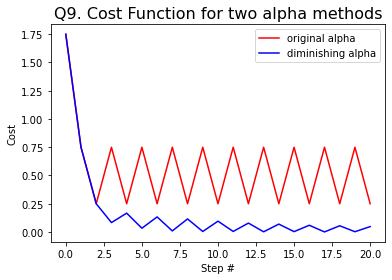

In [7]:
g = lambda x:abs(x)
alpha = 1
max_its = 20
w0 = 1.75
(weights, cost) = autograd_gradient_descent(g, alpha, max_its, w0)
(weights_dim, cost_dim) = dim_gradient_descent(g, alpha, max_its, w0)

##Your code here
plt.title("Q9. Cost Function for two alpha methods", size = 16)
plt.plot(cost, color = 'r', label = 'original alpha')
plt.plot(cost_dim, color = 'b', label = 'diminishing alpha')
plt.xlabel("Step #")
plt.ylabel("Cost")
plt.legend()

plt.show()

**Answer**: Algorithm with the diminishing alpha works better (blue plot) because the resulting cost is lower compared to the cost from original alpha (red plot). Additionally, it looks like the algorithm with the original alpha oscillates between two cost values, never reaching a true local/global minimum. 

We will now look at the oscilating behavior of gradient descent. 

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

10) [5 points] Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [8]:
#gradient descent function
#inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)

# import pandas as pd

def multiple_gradient_descent(g, alpha, max_its, w0):
    gradient = grad(g)
    
    weights_hist = []
    cost_hist = []
    
    # Code only for Initial Values
    w = w0
    cost_init = g(w)
    weights_hist.append(w)
    cost_hist.append(cost_init)
    
    for i in range(max_its): 
        w = w - alpha * gradient(w)
        cost = g(w)   # cost function defined above
        
        weights_hist.append(w)
        cost_hist.append(cost)
    
#     history_df = pd.DataFrame({'cost':cost_hist, 'weights':weights_hist})

    return weights_hist, cost_hist


11) [10 points] Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [3.0,3.0]
max_its = 10

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1



In [9]:
import autograd.numpy as np

# Cost Function and Parameters
g = lambda w: w[0]**2 + w[1] ** 2 + 2*np.sin(1.5*(w[0] + w[1])) + 2
w0 = np.array([3.0,3.0])
# g(np.array(w0)) # Cost Output
max_its = 10
alpha_1 = 0.01
alpha_2 = 0.1
alpha_3 = 1

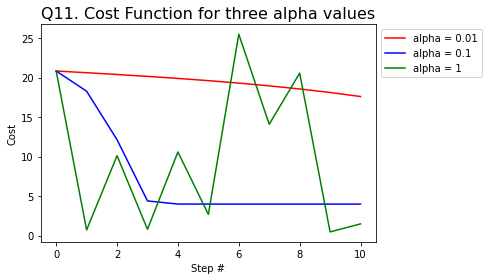

In [10]:
a1_w, a1_c = multiple_gradient_descent(g, alpha_1, max_its, w0)
a2_w, a2_c = multiple_gradient_descent(g, alpha_2, max_its, w0)
a3_w, a3_c = multiple_gradient_descent(g, alpha_3, max_its, w0)

##Your code here
plt.title("Q11. Cost Function for three alpha values", size = 16)
plt.plot(a1_c, color = 'r', label = 'alpha = 0.01')
plt.plot(a2_c, color = 'b', label = 'alpha = 0.1')
plt.plot(a3_c, color = 'g', label = 'alpha = 1')
plt.xlabel("Step #")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor =(1.0,1.0))

plt.show()

**Answer**: alpha = 1 leads to an oscillating behavior. This can be a bit expected since the alpha value is bigger compared to other ones. The oscillating behavior is clearer once you increase the max_iterations value. 

12) [15 points] This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$ 

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (using your intuition). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

Not that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

In [27]:
# New Cost Function and Parameters
g = lambda w: 2*(w[0])**2 + w[1]**2 + 4*(w[2])**2
w0 = np.array([5.0,5.0,5.0])

max_its = 100

alpha_1 = 0.25
alpha_2 = 0.1
alpha_3 = 0.05
alpha_4 = 0.01
alpha_5 = 0.001

a1_w, a1_c = multiple_gradient_descent(g, alpha_1, max_its, w0)
a2_w, a2_c = multiple_gradient_descent(g, alpha_2, max_its, w0)
a3_w, a3_c = multiple_gradient_descent(g, alpha_3, max_its, w0)
a4_w, a4_c = multiple_gradient_descent(g, alpha_4, max_its, w0)
a5_w, a5_c = multiple_gradient_descent(g, alpha_5, max_its, w0)

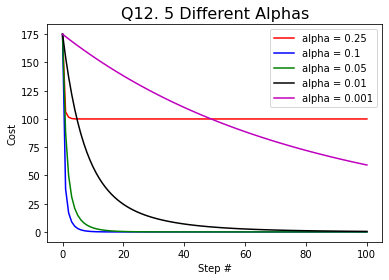

In [28]:

##Your code here
plt.title("Q12. 5 Different Alphas", size = 16)
plt.plot(a1_c, color = 'r', label = 'alpha = 0.25')
plt.plot(a2_c, color = 'b', label = 'alpha = 0.1')
plt.plot(a3_c, color = 'g', label = 'alpha = 0.05')
plt.plot(a4_c, color = 'k', label = 'alpha = 0.01')
plt.plot(a5_c, color = 'm', label = 'alpha = 0.001')
plt.xlabel("Step #")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor =(1.0,1.0))

plt.show()

**Answer**: Note that with alpha = 0.25, the cost function is "stuck" as it is not descending any more with more steps. All other alpha values seem to descend to a local minimum, with alpha=0.1 getting to the minimum the fastest. 